# Analyzing Capital Bikeshare Rentals

In this project, I analyze the Capital bikeshare system data between the years 2011-2012 to reveal patterns in the number of bike rentals in relation to temporal and seasonal changes.

Citation: Fanaee-T, H. (2013). Bike Sharing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

### Import libraries

In [6]:
from ucimlrepo import fetch_ucirepo 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


### Import and inspect the dataset

In [7]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets

# combine the target and features
combined_df = pd.concat([X, y], axis=1)


In [8]:
combined_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


In [10]:
combined_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### Data quality check


In [11]:
combined_df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Exploratory data analysis


8. Conclusions & Key Takeaways

Summarize the most important findings

Reflect on what the data tells you

Suggest practical recommendations

10. Polish and Share

Clean code: No unnecessary cells, errors, or warnings

Comment generously: Explain your thinking

Add markdown headers and bullet points

Publish on GitHub with README

Optional: Share on Kaggle or build a blog post

#### Target data

In [12]:
combined_df['cnt'].value_counts()

cnt
5      260
6      236
4      231
3      224
2      208
      ... 
938      1
826      1
963      1
708      1
636      1
Name: count, Length: 869, dtype: int64

In [13]:
mu = combined_df['cnt'].mean()
var = combined_df['cnt'].var()
print(f'Mean number of bikes rented: {mu:.2f}')
print(f'Variance in number of bikes rented: {var:.2f}')

Mean number of bikes rented: 189.46
Variance in number of bikes rented: 32901.46


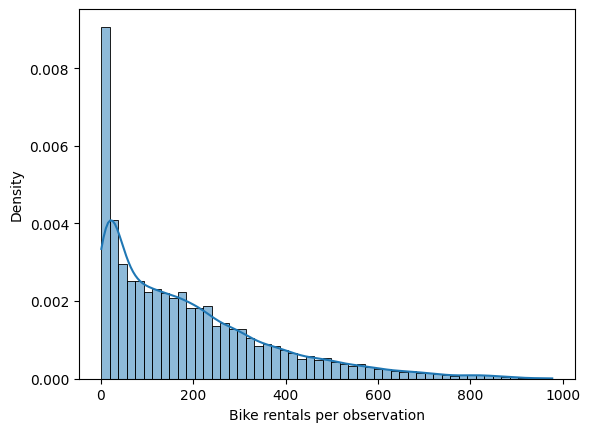

In [14]:
sns.histplot(data=combined_df, x='cnt', kde=True, stat='density', bins='auto')
plt.xlabel("Bike rentals per observation")
plt.ylabel("Density")
plt.show()

The number of bike rentals per observation ranges from 1 to 977 with a mean = 189.46 and variance = 32901.46. The distribution of bike rentals is overdispersed (variance is ~174 times larger than the mean) and right-skewed, which suggests that an appopriate distribution could be the Negative Binomial.

#### Explore numerical data

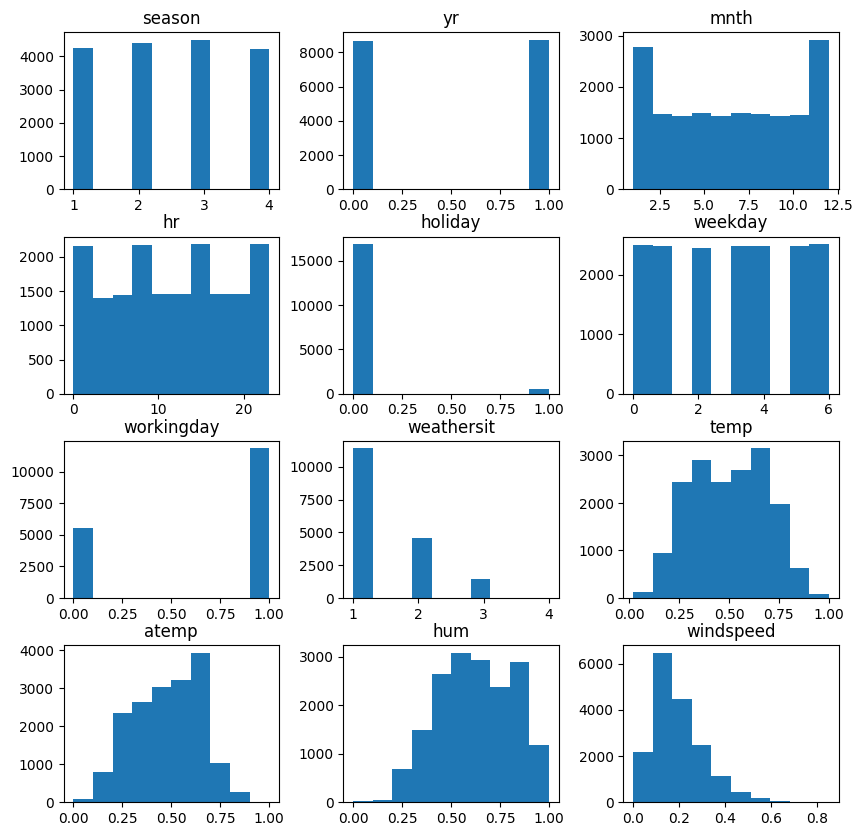

In [15]:
X.hist(figsize=(10,10), grid=False)
plt.show()

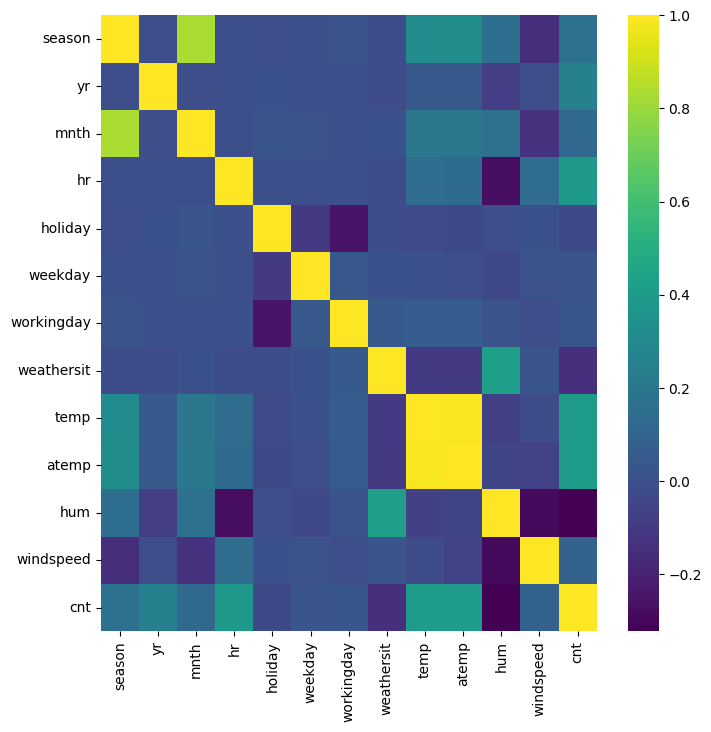

In [18]:
# Correlation
corr_mat = combined_df.corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(corr_mat, cmap='viridis')
plt.show()

In [22]:
corr_pairs = corr_mat.stack()
high_corr = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 1.0)]
print(high_corr)

season  mnth      0.830386
mnth    season    0.830386
temp    atemp     0.987672
atemp   temp      0.987672
dtype: float64


#### Explore categorical data

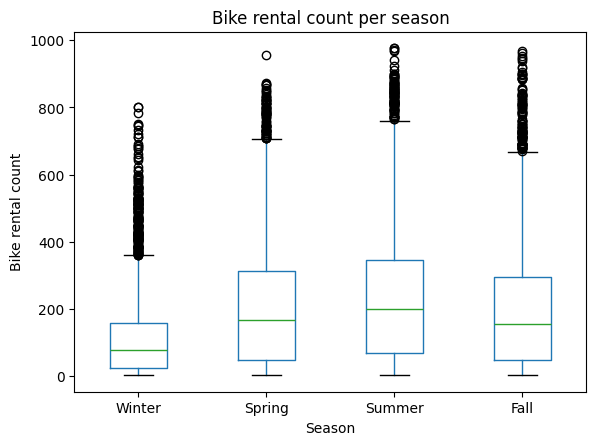

In [23]:
combined_df.boxplot(column="cnt", by="season", grid=False)
plt.title("Bike rental count per season")
plt.suptitle('')
plt.xlabel("Season")
plt.xticks(np.arange((combined_df["season"].nunique()))+1,
           labels=["Winter", "Spring", "Summer", "Fall"])
plt.ylabel("Bike rental count")
plt.show()

,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Winter,Spring,Summer,Fall
0,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,True,False,False,False
1,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,True,False,False,False
2,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,True,False,False,False
3,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,True,False,False,False
4,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,True,False,False,False


In [24]:
# ANOVA
season_model = ols('cnt ~ C(season)', data=combined_df).fit()
season_anova = sm.stats.anova_lm(season_model, typ=2)
print(season_anova)

# Tukey's HSD
season_tukey = pairwise_tukeyhsd(endog=combined_df['cnt'], groups=combined_df['season'], alpha=0.05)
print(season_tukey)

                 sum_sq       df           F         PR(>F)
C(season)  3.772936e+07      3.0  409.181037  7.401071e-257
Residual   5.340322e+08  17375.0         NaN            NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  97.2295    0.0   87.542  106.917   True
     1      3 124.9017    0.0 115.2603 134.5431   True
     1      4  87.7543    0.0   77.968  97.5406   True
     2      3  27.6722    0.0  18.1252  37.2192   True
     2      4  -9.4752 0.0582 -19.1685   0.2181  False
     3      4 -37.1474    0.0 -46.7946 -27.5001   True
------------------------------------------------------


ANOVA shows that there is a significant difference in the number of bikes rented among seasons. And the Tukuey's HSD reveals that bike rentals in winter are significantly lower than all other seasons and rentals are significantly higher in summer than all other seasons. Bike rentals in spring and fall are not significantly different from each other, but together the rentals are higher than in winter and lower than in summer seasons.

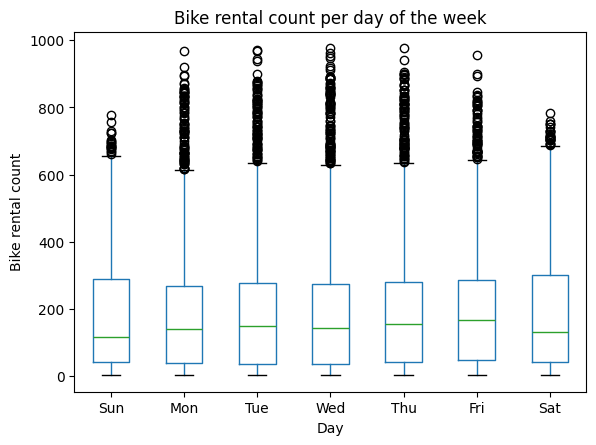

In [ ]:
combined_df.boxplot(column="cnt", by="weekday", grid=False)
plt.title("Bike rental count per day of the week")
plt.suptitle('')
plt.xlabel("Day")
plt.ylabel("Bike rental count")
plt.xticks(np.arange((combined_df["weekday"].nunique()))+1,
           labels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.show()

In [25]:
# Day of the week ANOVA
weekday_model = ols('cnt ~ C(weekday)', data=combined_df).fit()
weekday_anova = sm.stats.anova_lm(weekday_model, typ=2)
print(weekday_anova)

# Tukey's HSD
weekday_tukey = pairwise_tukeyhsd(endog=combined_df['cnt'], groups=combined_df['weekday'], alpha=0.05)
print(weekday_tukey)

                  sum_sq       df        F    PR(>F)
C(weekday)  6.879294e+05      6.0  3.48779  0.001899
Residual    5.710737e+08  17372.0      NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   6.2758 0.8861  -8.8745 21.4262  False
     0      2  13.7701 0.1052  -1.4206 28.9607  False
     0      3  13.6617 0.1092  -1.4948 28.8182  False
     0      4  18.9678 0.0042   3.8052 34.1305   True
     0      5  18.6671 0.0052    3.529 33.8052   True
     0      6   12.741 0.1636  -2.3593 27.8413  False
     1      2   7.4942 0.7736  -7.7313 22.7197  False
     1      3   7.3858 0.7836  -7.8056 22.5773  False
     1      4   12.692 0.1732  -2.5056 27.8896  False
     1      5  12.3913  0.195  -2.7818 27.5643  False
     1      6   6.4651 0.8703  -8.6702 21.6005  False
     2      3  -0.1084    1.0   -15.34 15.1232  False
     2      4   5.1978 0.9529  

c:\Users\Paul.Carvalho\Documents\data science\python\Bike-Sharing-EDA\venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


ANOVA and Tukey's HSD shows that bike rentals on Thursday and Friday are significantly higher than on Sunday.

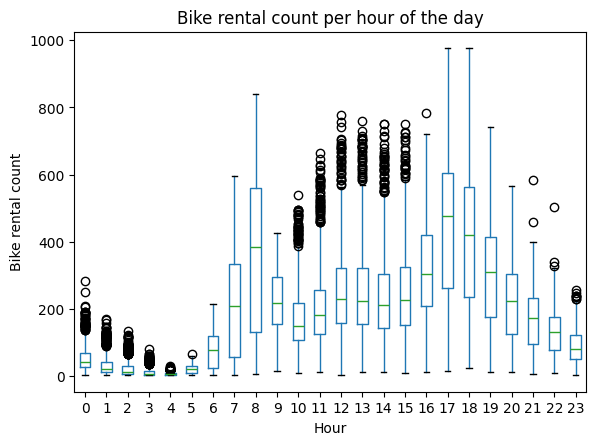

In [26]:
combined_df.boxplot(column='cnt', by='hr', grid=False)
plt.title("Bike rental count per hour of the day")
plt.suptitle('')
plt.xlabel("Hour")
plt.ylabel("Bike rental count")
plt.show()

In [27]:
# Hour of the day ANOVA
hr_model = ols('cnt ~ C(hr)', data=combined_df).fit()
hr_anova = sm.stats.anova_lm(hr_model, typ=2)
print(hr_anova)

# Tukey's HSD
hr_tukey = pairwise_tukeyhsd(endog=combined_df['cnt'], groups=combined_df['hr'], alpha=0.05)
print(hr_tukey)

                sum_sq       df           F  PR(>F)
C(hr)     2.867347e+08     23.0  759.086281     0.0
Residual  2.850269e+08  17355.0         NaN     NaN


c:\Users\Paul.Carvalho\Documents\data science\python\Bike-Sharing-EDA\venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  -20.5224 0.2636  -45.0086    3.9638  False
     0      2  -31.0281 0.0011  -55.5914   -6.4649   True
     0      3  -42.1707    0.0  -66.8932  -17.4481   True
     0      4  -47.5451    0.0  -72.2677  -22.8226   True
     0      5  -34.0083 0.0001  -58.5542   -9.4623   True
     0      6   22.1461 0.1433   -2.3317   46.6238  False
     0      7  158.1666    0.0  133.7057  182.6275   True
     0      8  305.1129    0.0   280.652  329.5738   True
     0      9  165.4114    0.0  140.9505  189.8723   True
     0     10  119.7704    0.0   95.3095  144.2313   True
     0     11   154.245    0.0  129.7841  178.7059   True
     0     12  199.4179    0.0  174.9654  223.8704   True
     0     13  199.7631    0.0   175.319  224.2072   True
     0     14  187.0512    0.0   162.607  211.4953   True
     0     15 

ANOVA and Tukey's HSD reveals a significant difference in bike rentals over the course of a day, and many of the pairwise comparisons among hours were significantly different from each other.

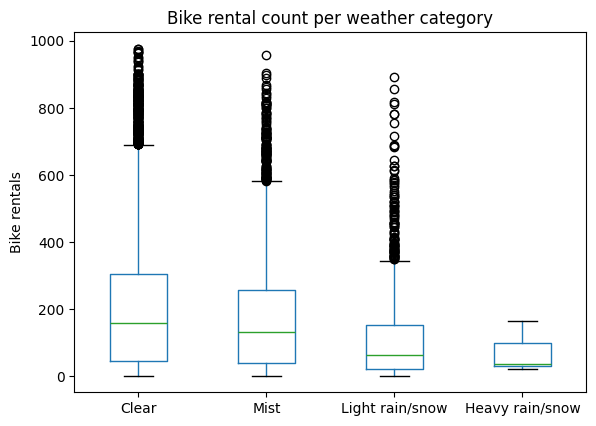

In [28]:
combined_df.boxplot(column="cnt", by="weathersit", grid=False)
plt.title("Bike rental count per weather category")
plt.suptitle('')
plt.xlabel("")
plt.xticks(np.arange((combined_df["weathersit"].nunique()))+1,
           labels=["Clear", "Mist", "Light rain/snow", "Heavy rain/snow"])
plt.ylabel("Bike rentals")
plt.show()

In [ ]:
# Weather ANOVA
weather_model = ols('cnt ~ C(weathersit)', data=combined_df).fit()
weather_anova = sm.stats.anova_lm(weather_model, typ=2)
print(weather_anova)

# Tukey's HSD
weather_tukey = pairwise_tukeyhsd(endog=combined_df['cnt'], groups=combined_df['weathersit'], alpha=0.05)
print(weather_tukey)

                     sum_sq       df           F        PR(>F)
C(weathersit)  1.228503e+07      3.0  127.173869  1.734782e-81
Residual       5.594766e+08  17375.0         NaN           NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2  -29.7038    0.0  -37.7909 -21.6166   True
     1      3    -93.29    0.0 -106.2676 -80.3123   True
     1      4 -130.5359 0.5886 -396.7534 135.6815  False
     2      3  -63.5862    0.0  -77.6067 -49.5658   True
     2      4 -100.8322 0.7649 -367.1025 165.4381  False
     3      4  -37.2459 0.9841 -303.7096 229.2177  False
--------------------------------------------------------


ANOVA and Tukey's HSD reveals a significant difference in bike renatls among weather situation. The pairwise comparisons are significantly difference accept for heavy rain/snow. However, visual inspection shows trend that bike rentals are generally lower in heavy rain/snow compared to the other weather categories.

In [29]:
# Temporal analysis
combined_df["dteday"] = pd.to_datetime(combined_df["dteday"])
combined_df.set_index('dteday', inplace=True)

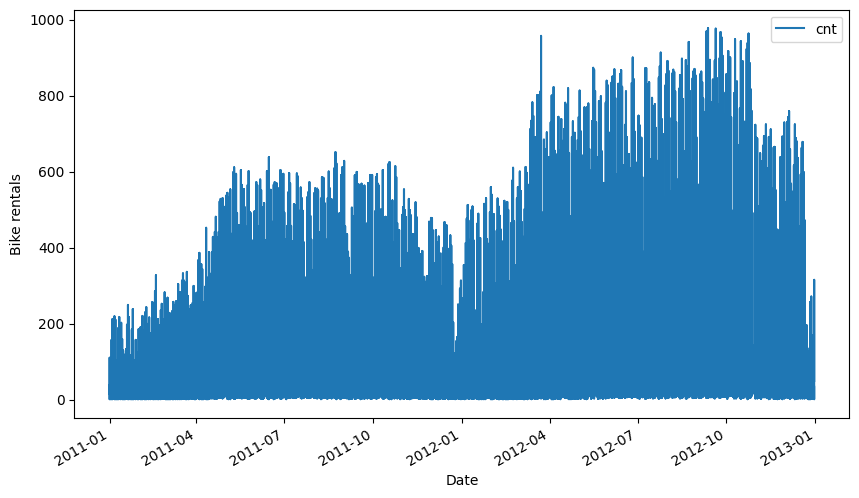

In [30]:
combined_df.plot(y="cnt", figsize=(10,6))
plt.ylabel("Bike rentals")
plt.xlabel("Date")
plt.show()

#### Feature engineering

In [32]:
# Day period - discretize hr into categories (morning, afternoon, evening, night)
def get_day_period(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 17 <= hour <= 20:
        return "Evening"
    else:
        return "Night"
    
combined_df["day_period"] = combined_df['hr'].apply(get_day_period)

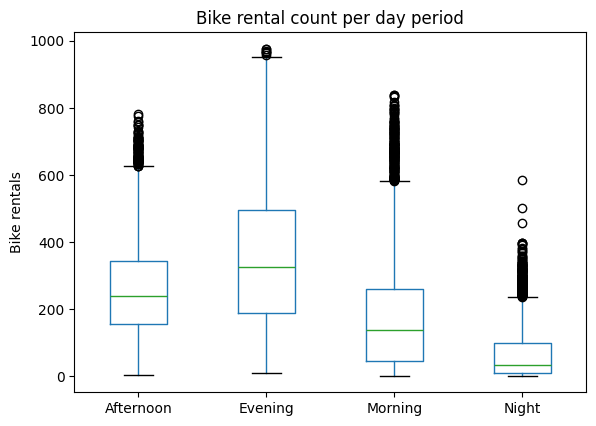

In [33]:
combined_df.boxplot(column="cnt", by="day_period", grid=False)
plt.title("Bike rental count per day period")
plt.suptitle('')
plt.xlabel("")
plt.ylabel("Bike rentals")
plt.show()

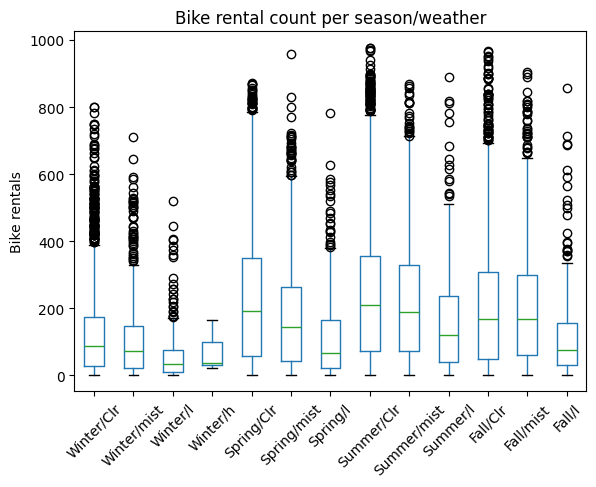

In [34]:
# Combine weather and season
combined_df['season_weather'] = combined_df['season'].astype(str) + '_' + combined_df['weathersit'].astype(str)
combined_df.boxplot(column="cnt", by="season_weather", grid=False)
plt.title("Bike rental count per season/weather")
plt.suptitle('')
plt.xlabel("")
plt.ylabel("Bike rentals")
plt.xticks(np.arange((combined_df["season_weather"].nunique()))+1,
           labels=['Winter/Clr', 'Winter/mist', 'Winter/l', "Winter/h",
                   'Spring/Clr', 'Spring/mist', 'Spring/l',
                   'Summer/Clr', 'Summer/mist', 'Summer/l',
                   'Fall/Clr', 'Fall/mist', 'Fall/l'],
           rotation=45)
plt.show()

In [36]:
combined_df["weathersit"].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

The general season and weather trends from above hold in this combined feature such that bike rentals are typically lower in winter and higher in summer and bike rentals tend to decrease going from clear weather to progressively worse weather conditions across all seasons. However, heavy rain/snow weather is the exception because there are only 3 data observations under this category.

### Conclusions and key takeaways

1. **Overall the demand is volatile**: The number of bike rentals is highly variable (variance = 32901) and skewed, with many periods of low use and some periods of really high use.

2. **Strong seasonal influence**: Demand is highest in the summer and lowest in the winter. Spring and fall show moderate demand and are statictically similar to each other.

3. **Weekly commuter pattern**: Rentals are significantly higher on Thursdays and Fridays compared to Sundays. In addition, rentals seem to peak in the morning around 8am and in the afternoon around 5pm. This indicates demand for commuting to and from work, particularly on Thursdays and Fridays.

4. **Weather is a major factor**: As weather conditions worsen from clear to light rain/snow, bike rentals consistently decrease. The trend for heavy rain/snow is inconclusive due to insufficient data (only 3 observations), but it's logical to assume demand is lowest in these conditions.

### Recommendations

1. Resource and fleet management: 
    - Deploy the maximum number of bikes during the summer to meet peak demand. Also, schedule major fleet maintenance/repairs and reduce the number of available bikes during the winter to lower operational costs.
    - Demand-based rebalancing - increase the availability of bikes at popular stations on Thursdays and Fridays. Redistribute bikes to match hourly demand during commuting hours. For example, moving bikes to residential areas prior to morning commutes and to business districts prior to the afternoon commute.
    - Use weather forecasts to predict demand. On days with poor weather forecasted, scaled back the fleet to rebalance efforts.
    
2. Marketing and pricing:
    - Boost off-peak ridership: Offer promotions and discounts during period of low demand such as in winter, Sundays, and midday hours.
    - Target commuters: Marketing campaigns that highlight the convenience and reliability of bike-share for commuting to and from work.